# Predicting Academic Performance of Students on a Final Exam (EDA)

### Problem Statement

Academic performance is an important factor and sign of long term success in professional and even personal success. As a result, many students, parents, and educators alike across all education stages are invested in a student's performance in the classroom. For my final project, I am creating a model that can predict a student's final exam performance based on several factors: age, gender, hours spent studying, hours spent on social media, Netflix hours, whether or not they had a part time job, attendance, hours of sleep, quality of diet, frequency of exercise, education level of parents, quality of internet, mental health rating, and extracirricular participation. By analyzing these factors, we will be able to uncover the correlation between variables that influence strong academic performance.  

This model can be useful for anyone in education, such as students, teachers, parents, counselors, or schools that are hoping to use data-driven information to improve student performance by providing resources and support like time management advice, mental health support, and academic policy changes. Ultimately, this model will assist in strengthening academic performance amongst students, as well as supporting educators to support students in effective ways to promote greater academic success.

### Dataset Description:
The dataset for this project is from Kaggle in csv format. It provides comprehensive data from 1000 students looking at academic perfomance from grades on a final exam and its correlation with different variables. Our data may require some cleaning if there are any unnecessary columns and null values. It may be challenging to accurately construct a regression model since there are many factors involved, including innate student differences not accounted for in the dataset, however, other factors should be more impactful and significant in predicting final exam performance that the results will be accurate enough to use.



### Data Pre-processing and Preliminary Examination

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [ ]:
#load dataset
students = pd.read_csv('student_habits_performance.csv')
df = pd.DataFrame(students)
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [ ]:
#check for missing values in the dataset
print(df.isna().sum())
print(df.isna().any().any())

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64
True


In [ ]:
#drop rows with null values in parental educational level
df = df.dropna(subset=['parental_education_level'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 909 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     909 non-null    object 
 1   age                            909 non-null    int64  
 2   gender                         909 non-null    object 
 3   study_hours_per_day            909 non-null    float64
 4   social_media_hours             909 non-null    float64
 5   netflix_hours                  909 non-null    float64
 6   part_time_job                  909 non-null    object 
 7   attendance_percentage          909 non-null    float64
 8   sleep_hours                    909 non-null    float64
 9   diet_quality                   909 non-null    object 
 10  exercise_frequency             909 non-null    int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               909 non-null    object 


In [ ]:
df['age'].min()

17

In [ ]:
df['age'].max()

24

In [ ]:
df['age'].mean()

np.float64(20.475247524752476)

In [ ]:
df['study_hours_per_day'].min()

0.0

In [ ]:
df['study_hours_per_day'].max()

8.3

In [ ]:
df['social_media_hours'].min()

0.0

In [ ]:
df['social_media_hours'].max()

7.2

In [ ]:
df['netflix_hours'].min()

0.0

In [ ]:
df['netflix_hours'].max()

5.4

In [ ]:
df['attendance_percentage'].min()

56.0

In [ ]:
df['attendance_percentage'].max()

100.0

In [ ]:
df['sleep_hours'].min()

3.2

In [ ]:
df['sleep_hours'].max()

10.0

In [ ]:
df['exercise_frequency'].min()

0

In [ ]:
df['exercise_frequency'].max()

6

In [ ]:
df['mental_health_rating'].min()

1

In [ ]:
df['mental_health_rating'].max()

10

The dataset I am working with consists of 909 students between the ages of 17 to 24. They vary in hours spent on studying (0 to 8.3 hours), Netflix (0 to 5.4 hours), social media (0 to 7.2 hours), sleep (3.2 to 10 hours), and have diffrerent percentages of attendance (50% to 100%), exercise frequency (0 to 6) and mental health ratings (1 to 10).


### Exploratory Data Analysis

In [ ]:
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


Descriptive Statistics

In [ ]:
#mean final exam grade
df['exam_score'].mean()

np.float64(69.55819581958195)

In [ ]:
#median final exam grade
df['exam_score'].median()

70.4

In [ ]:
#minimum score
df['exam_score'].min()

18.4

In [ ]:
#maximum score
df['exam_score'].max()

100.0

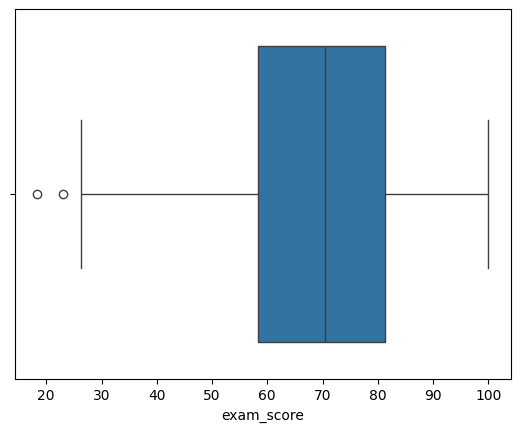

In [ ]:
#box and whisker plot of scores
sns.boxplot(x=df['exam_score'])
plt.show()

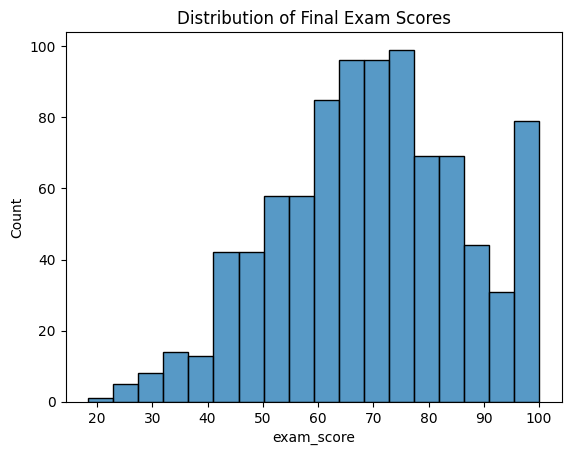

In [ ]:
#histogram of scores
sns.histplot(x=df['exam_score'])
plt.title('Distribution of Final Exam Scores')
plt.show()

Based on the above graphs and descriptive statistics, we can see that the mean of scores is slightly less than the median, showing that the data is slightly skewed left. This is supported by the histogram of the scores showing that there are a few very low values that are dragging the mean down, while most values are near the higher end.

### Initial Visualizations

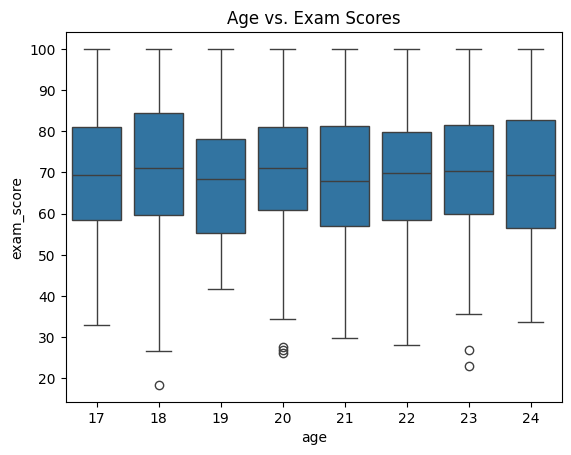

In [ ]:
#plot age aganist age and scores
sns.boxplot(x=df['age'], y=df['exam_score'])
title = plt.title('Age vs. Exam Scores')

This boxplot illustrates the distribution of exam scores across different student age groups, ranging from 17 to 24 years old. The median exam score remains relatively consistent across ages, hovering around 70 to 75 for most groups. The interquartile ranges (middle 50% of scores) are also similar, typically spanning from the mid-50s to the high 80s, suggesting a stable performance level regardless of age. However, the 18-year-old group appears to have a slightly higher median and a wider spread toward the top, potentially indicating more high-performing students in that age group. A few outliers,particularly among ages 18, 19, 20, and 23, show exam scores in the low 20s, but these are not representative of the broader trend. Overall, the plot suggests that age does not have a strong influence on exam performance within this college-age range.

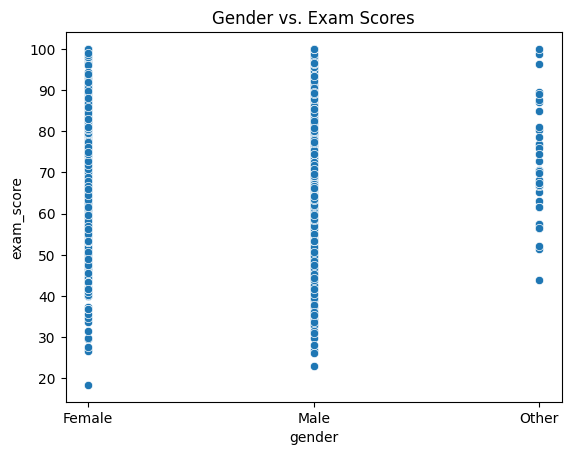

In [ ]:
#plot gender aganist scores
sns.scatterplot(x=df['gender'], y=df['exam_score'])
title = plt.title('Gender vs. Exam Scores')

This scatterplot visualizes the distribution of exam scores across gender categories: Female, Male, and Other. Each dot represents an individual student's score. The data shows that all three gender groups span nearly the full range of scores, from around 20 to 100. Female and Male students appear to have a similar vertical spread of scores, with many clustered between 60 and 90. The Other category has fewer data points but also shows a broad range, including multiple students scoring above 90. Overall, there is no clear performance gap between genders based on this visualization, and exam performance appears to be relatively consistent across gender identities. This suggests that gender is not a strong predictor of exam outcomes in this dataset.

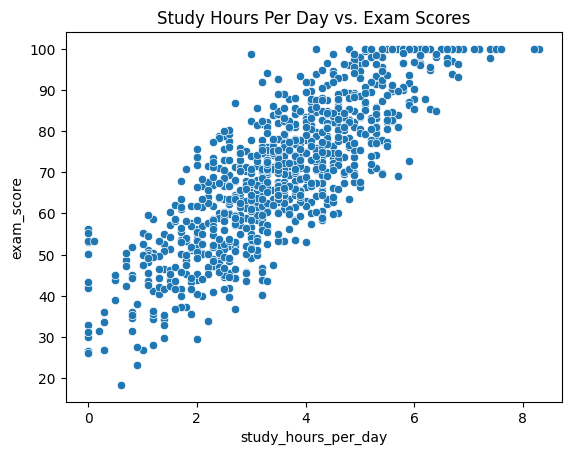

In [ ]:
#plot study hours per day aganist scores
sns.scatterplot(x=df['study_hours_per_day'], y=df['exam_score'])
title = plt.title('Study Hours Per Day vs. Exam Scores')

This scatterplot illustrates the relationship between the number of hours students study per day and their exam scores. There is a strong, linear, positive correlation that as study hours increase, exam scores also tend to rise. Most students who study between 3 and 6 hours per day score between 70 and 100, while those who study less than 2 hours often score below 70. The concentration of data points forms a strong upward slope, suggesting that increased study time is associated with better academic performance. Additionally, very few students who study more than 6 hours per day score below 80, supporting the idea that higher study commitment correlates with higher exam outcomes. This plot shows one of the strongest and most consistent relationships among the variables observed, highlighting study time as a key predictor of academic success.

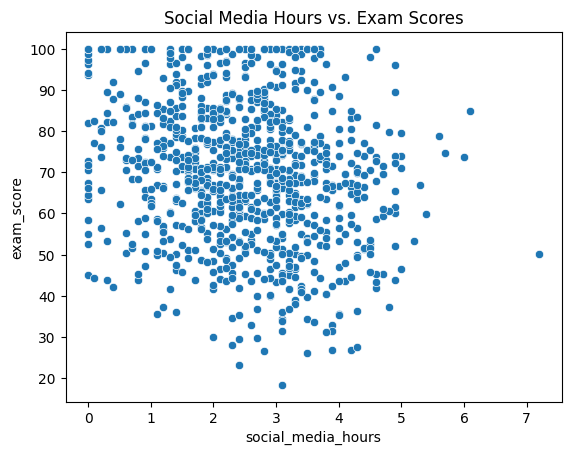

In [ ]:
#plot social media hours aganist scores
sns.scatterplot(x=df['social_media_hours'], y=df['exam_score'])
title = plt.title('Social Media Hours vs. Exam Scores')

This scatterplot displays the relationship between students’ daily social media usage (in hours) and their exam scores. Most students fall within the 0 to 5 hour range of social media use, with a dense cluster between 2 to 3 hours. Exam scores across this group are widely distributed, but the majority lie between 60 and 80. Notably, some students with 0 to 1 hour of social media still score below 50, while others reach perfect scores (100) — indicating that low social media use does not guarantee high performance. Similarly, students with 5 or more hours of social media generally have fewer high scores, suggesting a potential negative impact of excessive usage. While there's no strong linear correlation, there is a slight downward trend: higher social media use appears loosely associated with lower exam score ceilings. This implies that moderate to high social media usage may reduce the likelihood of top academic performance, though it’s not the sole determining factor.

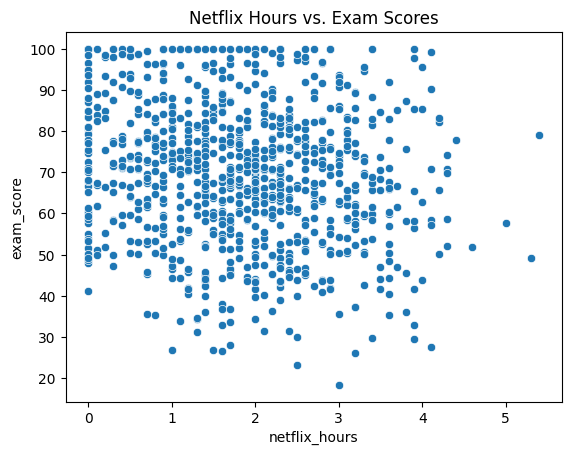

In [ ]:
#plot netflix hours aganist scores
sns.scatterplot(x=df['netflix_hours'], y=df['exam_score'])
title = plt.title('Netflix Hours vs. Exam Scores')

This scatterplot shows the relationship between students’ daily Netflix usage (in hours) and their exam scores. Most students report watching between 0 and 3 hours of Netflix per day, with a dense concentration between 1 and 2 hours. Exam scores in this range vary widely, typically falling between 50 and 90, and a noticeable number of students still reach the maximum score of 100, regardless of Netflix consumption. However, beyond 3 hours of Netflix viewing per day, exam scores begin to spread more thinly and appear less consistent, with fewer students achieving high scores. Students who watch 4 or more hours generally score between 40 and 80, suggesting a potential negative association between excessive Netflix usage and top academic performance. That said, the scatter remains diffuse, indicating no strong linear correlation overall. Like social media, Netflix consumption may influence academic success, but it is likely just one of several contributing factors.

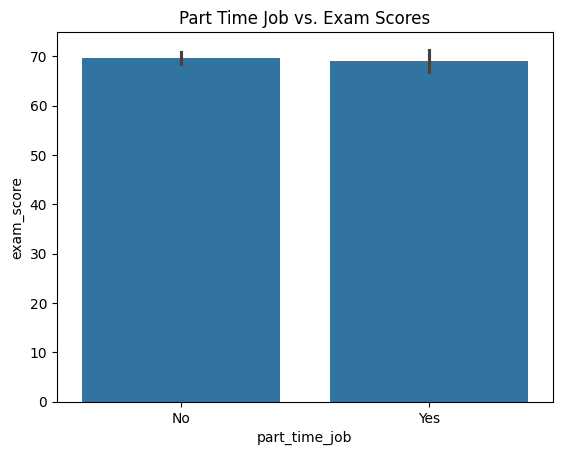

In [ ]:
#plot part time job aganist scores
sns.barplot(x=df['part_time_job'], y=df['exam_score']);
title = plt.title('Part Time Job vs. Exam Scores')

This bar chart compares the average exam scores of students who have a part-time job versus those who do not. Students without a part-time job have a slightly higher average exam score, around 70, compared to those with a part-time job, who average just under 70. The difference between the two groups is relatively small, and the overlapping error bars suggest that the gap may not be statistically significant. This indicates that having a part-time job does not dramatically impact academic performance, although there may be a slight academic advantage for students who are not balancing work with school responsibilities. Further analysis would be needed to determine whether other factors—like study habits or time management—interact with job status to affect performance.


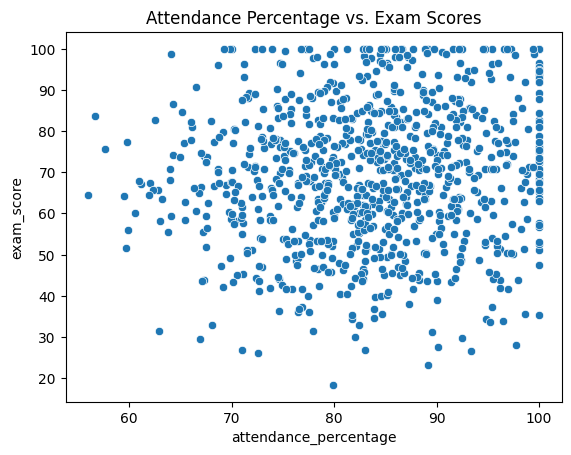

In [ ]:
#plot attendance percentage aganist scores
sns.scatterplot(x=df['attendance_percentage'], y=df['exam_score']);
title = plt.title('Attendance Percentage vs. Exam Scores')

This scatterplot examines the relationship between students' attendance percentage and their exam scores, which shows a weak upward trend. Students with attendance above 90% show a wide range of scores from around 40 to 100, indicating that high attendance alone does not guarantee top performance. Similarly, students with attendance between 60% and 80% also show varied results, with some scoring above 90. However, there is a slight clustering of lower scores below 70 among those with attendance below 75%, which suggests that very low attendance may correlate with reduced performance. Overall, although high attendance might be a necessary component of academic success, it is clearly not sufficient on its own, and other factors like study habits or mental health may play more significant roles.

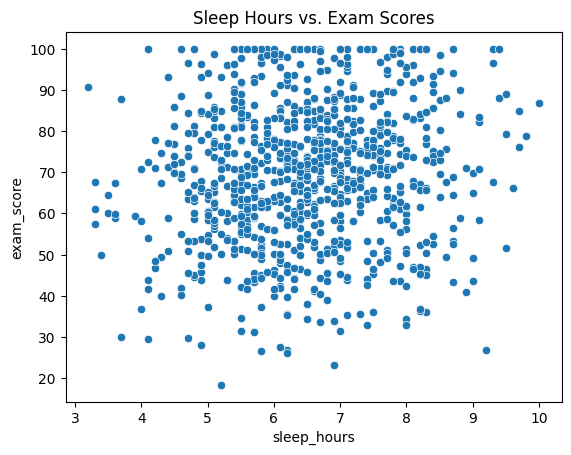

In [ ]:
#plot sleep hours aganist scores
sns.scatterplot(x=df['sleep_hours'], y=df['exam_score']);
title = plt.title('Sleep Hours vs. Exam Scores')

This scatterplot shows the relationship between students' average sleep hours per night and their exam scores. The majority of students report sleeping between 5 and 8 hours, with exam scores in this range spread widely from about 40 to 100. There is no clear linear trend in the data, indicating that sleep alone is not a strong predictor of academic performance in this sample. However, students who sleep fewer than 5 hours or more than 9 hours tend to be less common and show slightly more scattered performance, suggesting that extremely low or high sleep may not be optimal. Overall, while moderate sleep (6–8 hours) appears most common among students with average to high exam scores, the data does not support a direct or strong correlation between sleep duration and academic outcomes, and other lifestyle or behavioral factors may play a more dominant role.

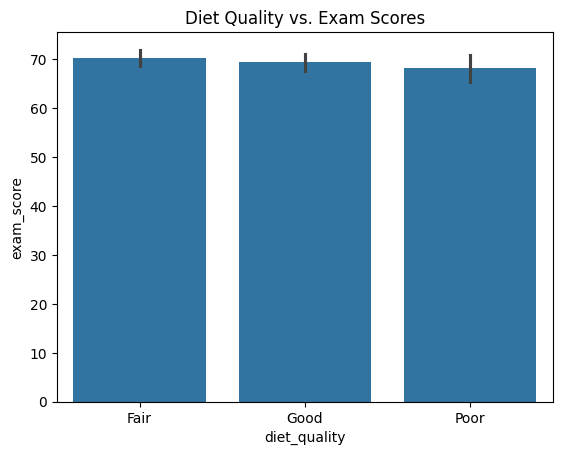

In [ ]:
#plot diet quality aganist scores
sns.barplot(x=df['diet_quality'], y=df['exam_score']);
title = plt.title('Diet Quality vs. Exam Scores')

This bar chart compares average exam scores aganist different levels of reported diet quality: Poor, Fair, and Good. Interestingly, students who rated their diet as "Fair" have the highest average exam score, slightly above 70. Those with “Good” and “Poor” diet quality both have slightly lower averages, just under 70. The differences between the groups are minimal, and the error bars show considerable overlap, suggesting that the variation may not be statistically significant. This implies that diet quality, may not be a strong individual predictor of exam performance. However, it may still interact with other factors like sleep or exercise to influence academic outcomes.

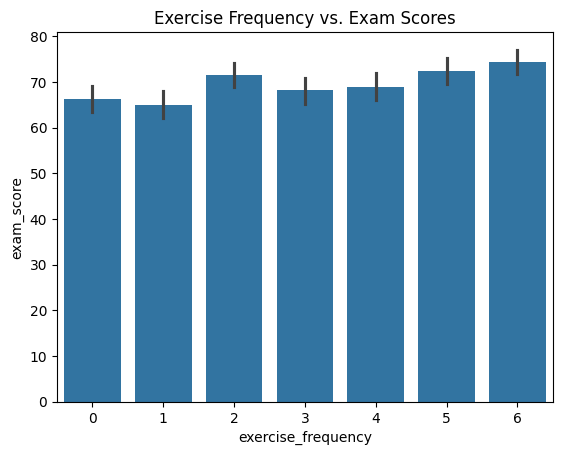

In [ ]:
#plot exercise frequency aganist scores
sns.barplot(x=df['exercise_frequency'], y=df['exam_score']);
title =  plt.title('Exercise Frequency vs. Exam Scores')

This bar chart shows the average exam scores for students based on how many days per week they exercise. There is a clear upward trend that students who exercise more frequently tend to score higher on their exams. Those who do not exercise at all average around 66, while students who exercise six days a week average above 74. There is some fluctuation in the middle, but overall the scores increase with more exercise. This suggests a possible link between physical activity and academic performance, with regular exercise potentially supporting students to have better focus, energy, or time management.

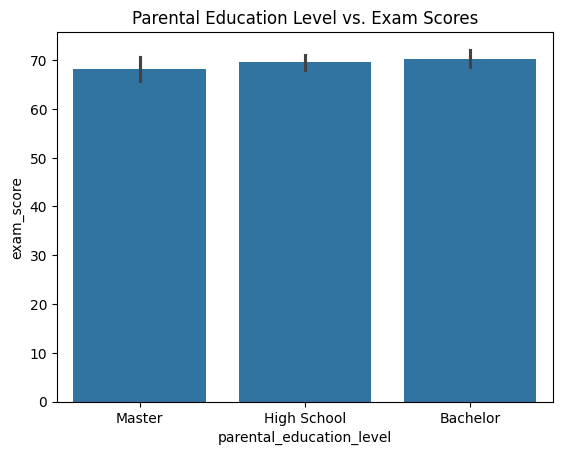

In [ ]:
#plot parental education level aganist scores
sns.barplot(x=df['parental_education_level'], y=df['exam_score']);
title = plt.title('Parental Education Level vs. Exam Scores')

This bar chart compares student average exam scores based on their parents’ highest level of education. Students whose parents have a bachelor’s degree have the highest average score, followed closely by those whose parents completed high school. Students whose parents hold a master’s degree have a slightly lower average than the other two groups. However, the differences are small, and the error bars overlap, suggesting that parental education level does not strongly affect exam performance in this dataset. This indicates that while parental background may play a role in shaping academic environments, it does not appear to be a major factor in determining student outcomes here.

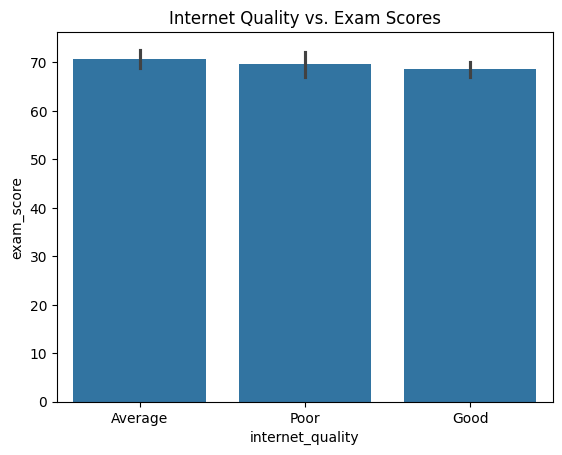

In [ ]:
#plot internet quality aganist scores
sns.barplot(x=df['internet_quality'], y=df['exam_score']);
title = plt.title('Internet Quality vs. Exam Scores')

This bar chart shows the average exam scores of students based on their reported internet quality: Poor, Average, and Good. Surprisingly, students with average internet quality have the highest average exam scores, followed closely by those with poor internet. Students with good internet report slightly lower average scores. The differences among the three groups are small, and the overlapping error bars suggest that internet quality does not have a strong or consistent impact on academic performance in this dataset. This may indicate that while internet access is important for completing assignments or accessing resources, its perceived quality does not significantly affect exam outcomes when other factors are also in play.

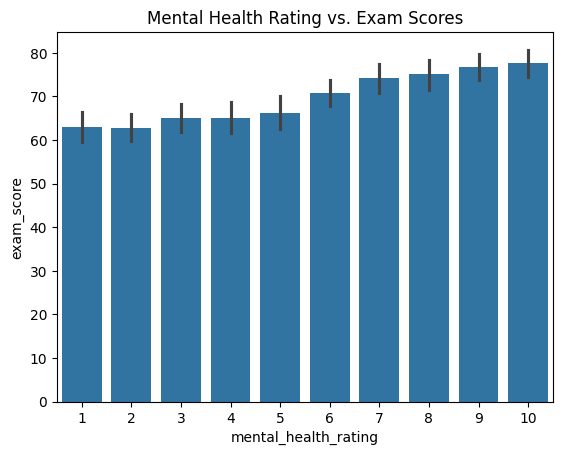

In [ ]:
#plot mental health rating aganist scores
sns.barplot(x=df['mental_health_rating'], y=df['exam_score']);
title = plt.title('Mental Health Rating vs. Exam Scores')

This bar chart displays average exam scores based on students' self-rated mental health, with ratings ranging from 1 (lowest) to 10 (highest). There is a clear upward trend: as mental health ratings increase, so do average exam scores. Students who rated their mental health between 1 and 5 tend to score in the mid-60s on average, while those who rated it a 10 score close to 80. The steady rise suggests a strong positive relationship between well-being and academic performance. This pattern highlights the importance of supporting students' mental health, as better mental well-being appears to be associated with higher academic outcomes.

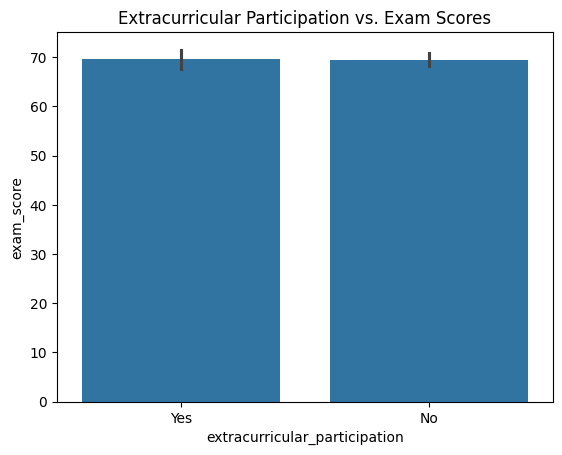

In [ ]:
#plot extracirricular participation aganist scores
sns.barplot(x=df['extracurricular_participation'], y=df['exam_score']);
title = plt.title('Extracurricular Participation vs. Exam Scores')

This bar chart compares the average exam scores of students who participate in extracurricular activities with those who do not. The average scores for both groups are nearly identical, around 70. The small difference between the bars and the overlapping error bars suggest that participation in extracurriculars does not have a significant impact on exam performance in this dataset. This may indicate that students are able to balance their academics with outside commitments effectively, or that other factors such as study habits or mental health play a larger role in academic outcomes.

### EDA Observations and Conclusions

Our EDA suggests that the most positively correlated factors with exam performance are hours spent studying per day, mental health rating, exercise frequency, and extracirricular participation. These factors showed a positive correlation in exam score, meaning that higher numbers in these factors resulted in a higher exam score.

On the other hand, our EDA suggested that hours spent on social media, hours spent on Netflix, and low attendence percentage were associated with worse exam performance, so generally, the more hours spent on social media and TV, and the lower the attendence percentage, resulted in a worse score, although they were not strong correlations indications and some factors, specifically attendence, may possibly just be a contributing factor.

Demographic factors like gender, age, part time job, sleep hours, diet quality, parental education level, and internet quality were not significant at all in performance as students across the factor had roughly the same performance.